<a href="https://colab.research.google.com/github/mralamdari/Computer-Vision-Projects/blob/main/Flowers_Recognition's_optimal_approach_TensorFlow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Hello 👋
####This repository will give you a simple approach (but an effective one) to code in TensorFlow that can be used recursively for any other problems in Machine Learning/Deep Learning Field.


#####Unfortunately, the Ram crushes in the Colab, so I can't train it with TensorFlow; if you have more ram, feel free to run this code, but if you don't have a powerful system to run it, you can run this code in [My Kaggle Notebook](https://www.kaggle.com/code/mralamdari/flowers-recognition-s-optimal-approach-tensorflow), there are more models with trainning results in this notebook and you can easily edit and run it.
#####You can get more details on this project and learn about object recognition on my article on medium; [How to do Object Recognition with TensorFlow(Keras) the Easiest way](https://medium.com/@mr.alamdari/imagehow-to-do-object-recognition-with-tensorflow-keras-the-easiest-way-23c7ab9604c7)

If you are interested in this project and want to learn it by another deep learning api like Pytorch, feel free to visit my code in [Github](https://github.com/mralamdari/Computer-Vision-Projects/blob/main/Object_Recognition/Flowers_Recognition's_optimal_approach_PyTorch.ipynb) or [Kaggle](https://www.kaggle.com/code/mralamdari/flowers-recognition-s-optimal-approach-pytorch/notebook); if you are seeking for more information, you can visit my article on medium; [How to do Object Recognition with PyTorch the Easiest way](https://medium.com/@mr.alamdari/uagehow-to-do-object-recognition-with-pytorch-the-easiest-way-d0a2750f5fe7)


In [ ]:
import os
import cv2
import copy
import time
import tqdm
import warnings
import matplotlib
import numpy as np
import pandas as pd
from PIL import Image
import seaborn as sns
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn import model_selection, metrics, preprocessing

In [ ]:
warnings.filterwarnings('ignore')
warnings.filterwarnings('always')

In [ ]:
os.environ['KAGGLE_CONFIG_DIR'] = '/content/drive/MyDrive'
!kaggle datasets download -d alxmamaev/flowers-recognition
!unzip \*.zip && rm *.zip

##Data
The Dataset in this project contains 4242 images of flowers; the data collection is based on the data Flickr, Google Images, and Yandex images, and it is used to recognize plants from the photo. There are five kinds of flowers: daisy, dandelion, rose, sunflower, and tulip, and each class has about 800 pictures of different sizes but not high resolutions. You can access the dataset here.

###1.Get Data

In [ ]:
path_folder = '/content/flowers'

size = 224
data = []
label = []
data_names = []
id = 0
for folder in tqdm.tqdm(os.listdir(path_folder)):
  for files in tqdm.tqdm(os.listdir(os.path.join(path_folder, folder))):
    if files.endswith('jpg'):
      label.append(folder)
      img_path = os.path.join(path_folder, folder, files)
      data_names.append((id, img_path))
      img = cv2.imread(img_path, cv2.IMREAD_COLOR)
      im = cv2.resize(img, (size, size))
      data.append(im)
      id += 1

In [ ]:
data = np.array(data)/255

In [ ]:
le = preprocessing.LabelEncoder()
y = le.fit_transform(label)
y = tf.keras.utils.to_categorical(y)

In [ ]:
data.shape

(4317, 224, 224, 3)

In [ ]:
y.shape

(4317, 5)

In [ ]:
len(data_names)

4317

###2.Preprocess Data

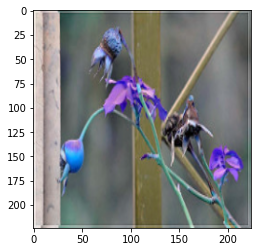

In [ ]:
plt.imshow(data[0])

In [ ]:
def plot_img(id):
  img_label = label[id]
  img = data[id]
  plt.imshow(img)
  plt.title(img_label)  

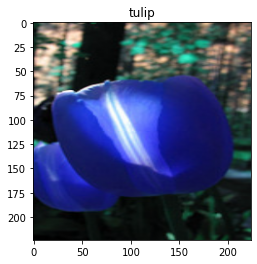

In [ ]:
rnd = np.random.randint(0, len(data))
plot_img(rnd)

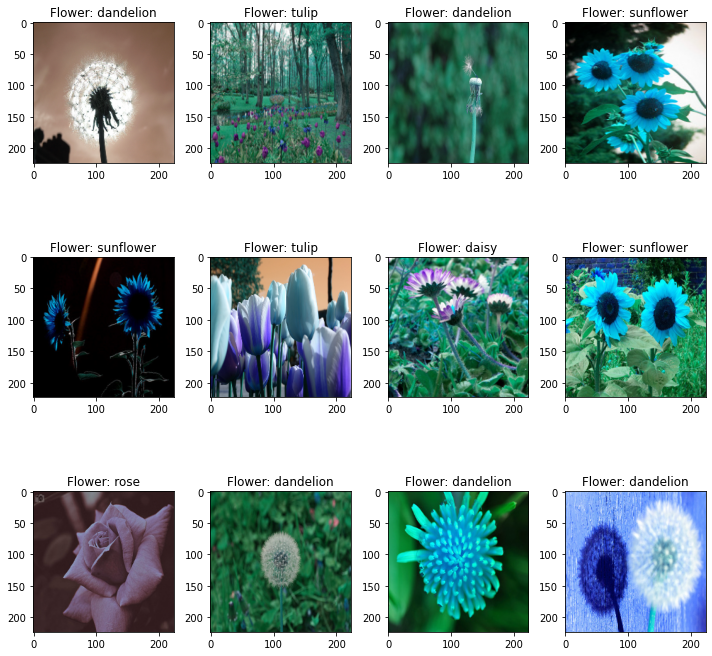

In [ ]:
row=3
col=4
fig, ax = plt.subplots(row, col)
fig.set_size_inches(10, 10)
for r in range(row):
  for c in range(col):
    rnd = np.random.randint(0, len(data))
    ax[r, c].imshow(data[rnd])
    ax[r, c].set_title(f'Flower: {label[rnd]}')
plt.tight_layout()

In [ ]:
x_train, x_test, y_train, y_test = model_selection.train_test_split(data, y, random_state=32, test_size=0.2)

##Model

In [ ]:
base_model = tf.keras.applications.vgg19.VGG19(include_top=False, weights='imagenet', input_shape=(224, 224, 3), pooling='avg')

In [ ]:
model = tf.keras.models.Sequential()
model.add(base_model)
model.add(tf.keras.layers.Dense(256, activation='relu'))
model.add(tf.keras.layers.Dense(5, activation='softmax'))
base_model.trainable=False

In [ ]:
model.compile(optimizer = tf.keras.optimizers.Adam(lr=1e-5),
              loss=tf.keras.losses.categorical_crossentropy,
              metrics=['accuracy'])

/usr/local/lib/python3.8/dist-packages/keras/optimizers/optimizer_v2/adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg19 (Functional)          (None, 512)               20024384  
                                                                 
 dense (Dense)               (None, 256)               131328    
                                                                 
 dense_1 (Dense)             (None, 5)                 1285      
                                                                 
Total params: 20,156,997
Trainable params: 132,613
Non-trainable params: 20,024,384
_________________________________________________________________


In [ ]:
history = model.fit(x_train,
                     y_train,
                     batch_size=32,
                     epochs=10,
                     validation_data=(x_test, y_test),
                     verbose=1,
                    steps_per_epoch=x_train.shape[0]//32)

In [ ]:
def plot_history(history, loss=True):

  num_epochs = len(history['loss'])
  title = 'loss' if loss else 'accuracy'
  plt.title(f'Train Validation {title}')
  plt.plot(range(1, num_epochs+1), history[f'{title}'], label='Train')
  plt.plot(range(1, num_epochs+1), history[f'val_{title}'], label='Validation')
  plt.xlabel('Trainig Epochs')
  plt.ylabel(title)
  plt.legend()
  plt.grid()
  plt.show()

In [ ]:
plot_history(history.history, False)

In [ ]:
plot_history(history.history, True)

## Prediction

to use the model in every other notebooks, Follow these two steps:
### 1.Save the model
### 2.Reload it and predict a normailized image

In [ ]:
model.save('my_model.h5', save_format = 'h5')

In [ ]:
N = np.random.randint(len(data))
X, Y = data[N], y[N]

In [ ]:
model_path = '/content/my_model.h5'

model = tf.keras.models.load_model(model_path)

model.evaluate(X.reshape((-1, 224, 224, 3))/255, Y)